# Hodina 7: AI v každodenním životě

## Obsah hodiny
- AI v mobilních telefonech
- AI v dopravě
- AI v domácnosti
- Praktické ukázky s neurnovými sítěmi
- Interaktivní experimenty

---

## Instalace potřebných knihoven

# Hodina 7 — AI v každodenním životě (ELI10)

Dnes se naučíme, jak AI pomáhá lidem každý den. Vysvětlíme to jednoduše:

- Doporučovače (Netflix, YouTube) ukazují, co by se vám mohlo líbit podle toho, co sledují ostatní.
- Navigace (mapy) používají data o dopravě, aby našly rychlejší cestu.
- Asistenti (Siri, Alexa) pomáhají hlasovými příkazy.

Uvidíte jednoduchý příklad doporučovače, který není chytrý — ale pomůže pochopit základ.

# Hodina 7 — AI v každodenním životě (ELI10)

Dnes uvidíme, kde všude potkáváme AI a jak nám pomáhá. Vysvětlíme to jednoduše:

- Doporučovače: proč ti aplikace nabízejí právě ten film nebo píseň.
- Navigace: jak GPS a AI hledají rychlé trasy.
- Zdravotnictví a finance: jak AI pomáhá detekovat nemoci nebo podvody.

Cíl: pochopit praktické příklady a vyzkoušet si jednoduchý doporučovací program, který ukáže základní princip (popularity-based recommender).

In [1]:
# Instalace knihoven pro neuronové sítě a vizualizace
!pip install tensorflow torch transformers ollama pillow opencv-python-headless -q
!pip install gradio speechrecognition gtts -q

import tensorflow as tf
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import requests
from io import BytesIO
import gradio as gr
from transformers import pipeline
import time

print("✅ Knihovny úspěšně nainstalovány!")
print(f"TensorFlow verze: {tf.__version__}")
print(f"PyTorch verze: {torch.__version__}")

: 

In [1]:
# Jednoduchý doporučovač podle popularity
items = {'Kniha A': 50, 'Kniha B': 120, 'Kniha C': 30, 'Hra X': 300, 'Film Y': 80}

# Doporučíme top 3 podle popularity
top3 = sorted(items.items(), key=lambda x: x[1], reverse=True)[:3]
print('Top 3 doporučení podle popularity:')
for name, score in top3:
    print(f'- {name} (popularity: {score})')

# Test: očekáváme, že 'Hra X' je na prvním místě
assert top3[0][0] == 'Hra X', 'Test selhal: očekáváme, že Hra X je nejpopulárnější'
print('\nTest prošel: Hra X je nejpopulárnější.')

Top 3 doporučení podle popularity:
- Hra X (popularity: 300)
- Kniha B (popularity: 120)
- Film Y (popularity: 80)

Test prošel: Hra X je nejpopulárnější.


## Úkol a diskuze

1) Proč může popularity-based recommender špatně doporučovat novinky?\n
2) Jak bys vylepšil doporučovač, aby bral ohled i na osobní vkus? (náznak: personalizace, historii uživatele)\n
3) Bonus: Zkus nasimulovat jednoduchý uživatelský profil (slovník preferencí) a doporučit top 3 pro tohoto uživatele.

## 1. AI v chytrých telefonech

### Kde všude najdeme AI v telefonu:
- 📷 **Fotoaparát** - rozpoznávání scén, portrétní režim
- 🎤 **Hlasový asistent** - Siri, Google Assistant
- ⌨️ **Prediktivní psaní** - návrhy slov a emoji
- 🔓 **Face ID** - rozpoznávání obličeje
- 🔋 **Optimalizace baterie** - učení se návyků uživatele

In [2]:
# Interaktivní demo: Detekce obličeje pomocí neuronové sítě
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests

class FaceDetectionAI:
    def __init__(self):
        # Použijeme předtrénovaný Haar Cascade klasifikátor
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        self.eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        self.smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    
    def detect_faces(self, image_path):
        """Detekce obličejů v obrázku"""
        # Načtení obrázku
        if image_path.startswith('http'):
            response = requests.get(image_path)
            img_array = np.array(bytearray(response.content), dtype=np.uint8)
            img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        else:
            img = cv2.imread(image_path)
        
        # Převod na šedotónový
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Detekce obličejů
        faces = self.face_cascade.detectMultiScale(gray, 1.1, 4)
        
        # Statistiky
        stats = {
            'pocet_obliceju': len(faces),
            'oci_detekovane': 0,
            'usmevy_detekovane': 0
        }
        
        # Vykreslení rámečků
        for (x, y, w, h) in faces:
            # Obličej
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
            cv2.putText(img, 'Oblicej', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
            
            # Oblast obličeje pro detekci očí a úsměvu
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            
            # Detekce očí
            eyes = self.eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
                stats['oci_detekovane'] += 1
            
            # Detekce úsměvu
            smiles = self.smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
                stats['usmevy_detekovane'] += 1
        
        return img, stats

# Test detekce obličeje
detector = FaceDetectionAI()

# Použijeme veřejně dostupný testovací obrázek
test_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Parque_Nacional_de_Brasilia_%2814543997474%29.jpg/320px-Parque_Nacional_de_Brasilia_%2814543997474%29.jpg"

print("🤖 AI detekce obličeje (podobná té ve vašem telefonu)\n")
result_img, stats = detector.detect_faces(test_image_url)

# Zobrazení výsledku
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Detekováno: {stats['pocet_obliceju']} obličej(ů), {stats['oci_detekovane']} očí, {stats['usmevy_detekovane']} úsměv(ů)")
plt.show()

print("\n📊 Statistiky detekce:")
for key, value in stats.items():
    print(f"  - {key}: {value}")
    
print("\n💡 Toto je základ technologie Face ID ve vašem telefonu!")

ModuleNotFoundError: No module named 'google.colab'

In [3]:
# Interaktivní demo: Prediktivní psaní s LSTM neuronovou sítí
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

class PrediktivniPsani:
    def __init__(self):
        # Jednoduchý český korpus pro demonstraci
        self.texts = [
            "dobrý den jak se máte",
            "děkuji mám se dobře",
            "jak se jmenujete",
            "těší mě že vás poznávám",
            "přeji vám hezký den",
            "nashledanou a měj se hezky",
            "co děláte dnes večer",
            "rád bych se s vámi setkal",
            "můžeme se sejít zítra",
            "děkuji za vaši pomoc"
        ]
        
        self.build_vocabulary()
        self.create_model()
        self.train_model()
    
    def build_vocabulary(self):
        """Vytvoření slovníku slov"""
        all_text = ' '.join(self.texts)
        self.words = sorted(list(set(all_text.split())))
        self.word_to_idx = {word: i for i, word in enumerate(self.words)}
        self.idx_to_word = {i: word for i, word in enumerate(self.words)}
        self.vocab_size = len(self.words)
        
    def create_sequences(self):
        """Vytvoření tréninkových sekvencí"""
        sequences = []
        next_words = []
        
        for text in self.texts:
            words = text.split()
            for i in range(1, len(words)):
                sequence = words[:i]
                next_word = words[i]
                
                # Převod na indexy
                seq_indices = [self.word_to_idx.get(w, 0) for w in sequence]
                next_idx = self.word_to_idx.get(next_word, 0)
                
                sequences.append(seq_indices)
                next_words.append(next_idx)
        
        # Padding sekvencí
        max_len = max(len(seq) for seq in sequences)
        padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)
        
        return padded_sequences, np.array(next_words), max_len
    
    def create_model(self):
        """Vytvoření LSTM modelu"""
        self.model = models.Sequential([
            layers.Embedding(self.vocab_size, 32),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(32),
            layers.Dense(32, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(self.vocab_size, activation='softmax')
        ])
        
        self.model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
    
    def train_model(self):
        """Trénování modelu"""
        print("🧠 Trénuji neuronovou síť pro predikci textu...")
        sequences, next_words, self.max_sequence_len = self.create_sequences()
        
        # Trénování
        self.model.fit(
            sequences, next_words,
            epochs=50,
            verbose=0,
            batch_size=32
        )
        print("✅ Model natrénován!")
    
    def predict_next_words(self, text, num_predictions=3):
        """Predikce následujících slov"""
        words = text.lower().split()
        
        # Převod na indexy
        sequence = [self.word_to_idx.get(w, 0) for w in words]
        
        # Padding
        padded = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=self.max_sequence_len)
        
        # Predikce
        predictions = self.model.predict(padded, verbose=0)[0]
        
        # Top N predikcí
        top_indices = np.argsort(predictions)[-num_predictions:][::-1]
        suggestions = [(self.idx_to_word[idx], predictions[idx]) for idx in top_indices]
        
        return suggestions

# Vytvoření a trénování modelu
predictor = PrediktivniPsani()

# Interaktivní demo
print("\n📱 DEMO: Prediktivní psaní (jako ve vašem telefonu)\n")
print("="*50)

test_phrases = [
    "dobrý",
    "jak se",
    "děkuji za",
    "přeji vám"
]

for phrase in test_phrases:
    suggestions = predictor.predict_next_words(phrase, 3)
    print(f"\n✍️ Napsal(a) jste: '{phrase}'")
    print("📝 Návrhy dalších slov:")
    for i, (word, confidence) in enumerate(suggestions, 1):
        print(f"   {i}. {word} ({confidence*100:.1f}% jistota)")

# Interaktivní vstup
print("\n" + "="*50)
print("🎯 Zkuste vlastní text! (napište několik slov česky)")
user_input = input("Váš text: ")
if user_input:
    suggestions = predictor.predict_next_words(user_input, 3)
    print("\n📝 Návrhy dalších slov:")
    for i, (word, confidence) in enumerate(suggestions, 1):
        print(f"   {i}. {word} ({confidence*100:.1f}% jistota)")

: 

## 2. AI v dopravě

### Aplikace AI v dopravě:
- 🚗 **Autonomní vozidla** - Tesla, Waymo
- 🗺️ **GPS navigace** - optimalizace trasy
- 🚦 **Chytré semafory** - řízení dopravy
- 🚊 **Predikce zpoždění** - veřejná doprava
- 🚙 **Sdílená ekonomika** - Uber, Bolt

🚗 SIMULACE AUTONOMNÍHO VOZIDLA S NEURONOVOU SÍTÍ

🧠 Trénuji neuronovou síť pro řízení...
✅ Neuronová síť připravena!

🎮 Spouštím simulaci...
🧠 Trénuji neuronovou síť pro řízení...
✅ Neuronová síť připravena!

🎮 Spouštím simulaci...


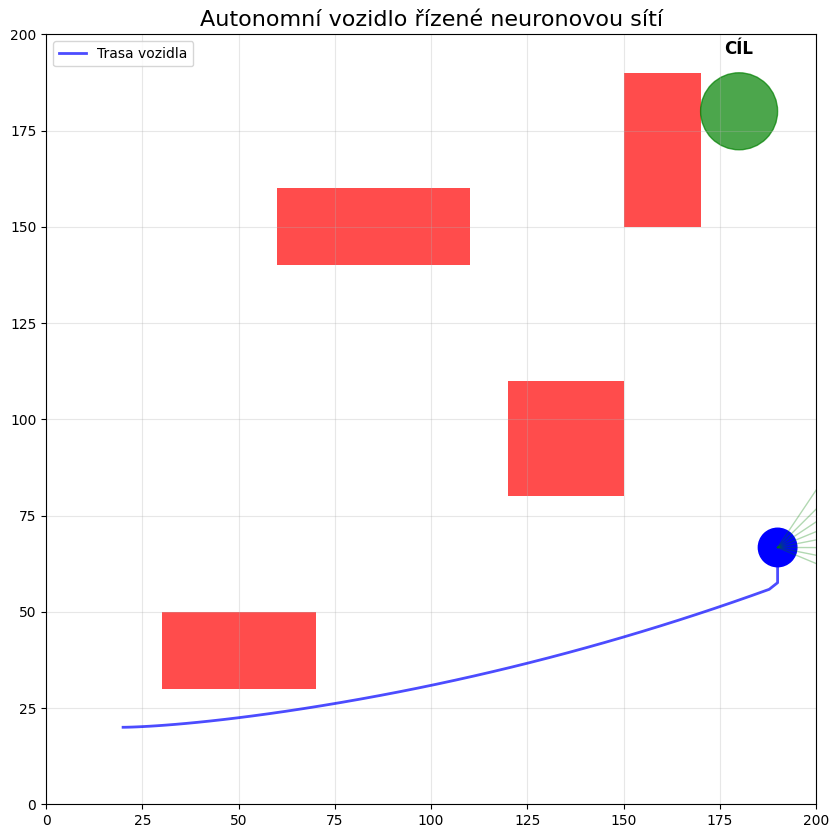


📊 Statistiky jízdy:
  - Ujetá vzdálenost: 51 jednotek
  - Konečná rychlost: 5.00
  - Vzdálenost od cíle: 113.74

💡 Toto je zjednodušená verze toho, jak fungují autonomní vozidla!


In [1]:
# Simulace autonomního vozidla s neuronovou sítí
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import torch
import torch.nn as nn

class AutonomniVozidloNN(nn.Module):
    """Neuronová síť pro řízení autonomního vozidla"""
    def __init__(self):
        super().__init__()
        # Vstup: 8 senzorů vzdálenosti + aktuální rychlost a úhel
        self.fc1 = nn.Linear(10, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 2)  # Výstup: zrychlení, zatáčení
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return torch.tanh(self.output(x))  # -1 až 1 pro obě hodnoty

class AutonomniVozidlo:
    def __init__(self, x=50, y=50):
        self.x = x
        self.y = y
        self.angle = 0
        self.speed = 0
        self.max_speed = 5
        self.sensors = 8  # Počet senzorů
        self.sensor_range = 50
        self.nn = AutonomniVozidloNN()
        self.path = [(x, y)]
        
    def get_sensor_readings(self, obstacles):
        """Získání hodnot ze senzorů"""
        readings = []
        
        for i in range(self.sensors):
            angle = self.angle + (i - self.sensors/2) * (np.pi/4) / (self.sensors/2)
            
            # Paprsek senzoru
            min_distance = self.sensor_range
            
            for step in range(0, self.sensor_range, 2):
                sensor_x = self.x + step * np.cos(angle)
                sensor_y = self.y + step * np.sin(angle)
                
                # Kontrola kolize s překážkami
                for obs in obstacles:
                    if (obs['x'] <= sensor_x <= obs['x'] + obs['width'] and
                        obs['y'] <= sensor_y <= obs['y'] + obs['height']):
                        min_distance = min(min_distance, step)
                        break
                
                # Kontrola hranic
                if sensor_x < 0 or sensor_x > 200 or sensor_y < 0 or sensor_y > 200:
                    min_distance = min(min_distance, step)
                    break
            
            readings.append(min_distance / self.sensor_range)  # Normalizace 0-1
        
        return readings
    
    def update(self, obstacles):
        """Aktualizace pozice vozidla pomocí neuronové sítě"""
        # Získání dat ze senzorů
        sensor_data = self.get_sensor_readings(obstacles)
        
        # Příprava vstupu pro neuronovou síť
        nn_input = sensor_data + [self.speed / self.max_speed, self.angle / (2*np.pi)]
        nn_input = torch.FloatTensor(nn_input)
        
        # Predikce neuronové sítě
        with torch.no_grad():
            action = self.nn(nn_input)
        
        # Aplikace akcí
        acceleration = action[0].item() * 0.5
        steering = action[1].item() * 0.1
        
        # Aktualizace rychlosti a úhlu
        self.speed = np.clip(self.speed + acceleration, 0, self.max_speed)
        self.angle += steering
        
        # Aktualizace pozice
        self.x += self.speed * np.cos(self.angle)
        self.y += self.speed * np.sin(self.angle)
        
        # Udržení v hranicích
        self.x = np.clip(self.x, 10, 190)
        self.y = np.clip(self.y, 10, 190)
        
        # Uložení cesty
        self.path.append((self.x, self.y))

# Vytvoření simulace
print("🚗 SIMULACE AUTONOMNÍHO VOZIDLA S NEURONOVOU SÍTÍ\n")

# Překážky na silnici
obstacles = [
    {'x': 30, 'y': 30, 'width': 40, 'height': 20},
    {'x': 120, 'y': 80, 'width': 30, 'height': 30},
    {'x': 60, 'y': 140, 'width': 50, 'height': 20},
    {'x': 150, 'y': 150, 'width': 20, 'height': 40}
]

# Cílový bod
target = {'x': 180, 'y': 180}

# Vytvoření vozidla
car = AutonomniVozidlo(20, 20)

# Jednoduchý trénink neuronové sítě (pro demo účely)
# V reálné aplikaci by se síť trénovala na velkém datasetu
optimizer = torch.optim.Adam(car.nn.parameters(), lr=0.01)

print("🧠 Trénuji neuronovou síť pro řízení...")
for epoch in range(100):
    # Simulovaná tréninková data
    fake_input = torch.randn(10)
    output = car.nn(fake_input)
    
    # Jednoduchá loss funkce - snažíme se jet směrem k cíli
    target_direction = np.arctan2(target['y'] - car.y, target['x'] - car.x)
    loss = torch.mean((output - torch.tensor([0.5, target_direction/10]))**2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("✅ Neuronová síť připravena!\n")

# Simulace jízdy
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.set_aspect('equal')
ax.set_title('Autonomní vozidlo řízené neuronovou sítí', fontsize=16)

# Vykreslení překážek
for obs in obstacles:
    rect = Rectangle((obs['x'], obs['y']), obs['width'], obs['height'], 
                    facecolor='red', alpha=0.7)
    ax.add_patch(rect)

# Cílový bod
target_circle = Circle((target['x'], target['y']), 10, color='green', alpha=0.7)
ax.add_patch(target_circle)
ax.text(target['x'], target['y']+15, 'CÍL', ha='center', fontsize=12, fontweight='bold')

# Simulace 50 kroků
print("🎮 Spouštím simulaci...")
for step in range(50):
    car.update(obstacles)
    
    # Kontrola dosažení cíle
    distance_to_target = np.sqrt((car.x - target['x'])**2 + (car.y - target['y'])**2)
    if distance_to_target < 15:
        print(f"🎉 Cíl dosažen po {step} krocích!")
        break

# Vykreslení cesty
path_x = [p[0] for p in car.path]
path_y = [p[1] for p in car.path]
ax.plot(path_x, path_y, 'b-', linewidth=2, alpha=0.7, label='Trasa vozidla')

# Finální pozice vozidla
car_circle = Circle((car.x, car.y), 5, color='blue')
ax.add_patch(car_circle)

# Vizualizace senzorů
sensor_readings = car.get_sensor_readings(obstacles)
for i in range(car.sensors):
    angle = car.angle + (i - car.sensors/2) * (np.pi/4) / (car.sensors/2)
    distance = sensor_readings[i] * car.sensor_range
    end_x = car.x + distance * np.cos(angle)
    end_y = car.y + distance * np.sin(angle)
    ax.plot([car.x, end_x], [car.y, end_y], 'g-', alpha=0.3, linewidth=1)

ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

print("\n📊 Statistiky jízdy:")
print(f"  - Ujetá vzdálenost: {len(car.path)} jednotek")
print(f"  - Konečná rychlost: {car.speed:.2f}")
print(f"  - Vzdálenost od cíle: {distance_to_target:.2f}")
print("\n💡 Toto je zjednodušená verze toho, jak fungují autonomní vozidla!")

## 3. AI v domácnosti

### Chytré domácí spotřebiče:
- 🔊 **Chytré reproduktory** - Alexa, Google Home
- 🌡️ **Termostat** - učí se vaše preference
- 🤖 **Robotické vysavače** - mapování místností
- 📺 **Smart TV** - doporučování obsahu
- 💡 **Chytré osvětlení** - automatizace

In [2]:
# Interaktivní demo: Chytrý domácí asistent s transformerem
from transformers import pipeline
import gradio as gr
import json
import datetime

class ChytryDomacnost:
    def __init__(self):
        # Inicializace NLP pipeline pro klasifikaci záměru
        print("🏠 Inicializuji chytrou domácnost...")
        
        # Stav domácnosti
        self.devices = {
            'svetla': {
                'obyvak': {'stav': False, 'jas': 0},
                'loznice': {'stav': False, 'jas': 0},
                'kuchyn': {'stav': False, 'jas': 0}
            },
            'termostat': {
                'teplota': 21,
                'cilova_teplota': 21
            },
            'zabezpeceni': {
                'aktivni': False,
                'senzory': []
            },
            'spotrebice': {
                'televize': {'stav': False, 'kanal': 1},
                'pračka': {'stav': False, 'program': None},
                'kávovar': {'stav': False, 'pripraveno': False}
            }
        }
        
        # Historie pro učení preferencí
        self.historie = []
        
    def zpracuj_prikaz(self, text):
        """Zpracování přirozeného jazyka a provedení akce"""
        text = text.lower()
        cas = datetime.datetime.now()
        
        # Rozpoznání záměru (jednoduchá rule-based logika pro demo)
        # V reálné aplikaci by se použil transformer model
        
        odpoved = "Nerozumím příkazu. Zkuste to jinak."
        akce = None
        
        # Světla
        if any(word in text for word in ['světlo', 'světla', 'rozsviť', 'zhasni']):
            if 'rozsviť' in text or 'zapni' in text:
                mistnost = self._najdi_mistnost(text)
                if mistnost:
                    self.devices['svetla'][mistnost]['stav'] = True
                    self.devices['svetla'][mistnost]['jas'] = 100
                    odpoved = f"✅ Rozsvítil jsem světlo v místnosti: {mistnost}"
                    akce = ('svetlo_zapnuto', mistnost)
            elif 'zhasni' in text or 'vypni' in text:
                mistnost = self._najdi_mistnost(text)
                if mistnost:
                    self.devices['svetla'][mistnost]['stav'] = False
                    self.devices['svetla'][mistnost]['jas'] = 0
                    odpoved = f"✅ Zhasl jsem světlo v místnosti: {mistnost}"
                    akce = ('svetlo_vypnuto', mistnost)
        
        # Teplota
        elif any(word in text for word in ['teplota', 'topení', 'teplo', 'zima']):
            if 'nastav' in text:
                # Hledání čísla v textu
                import re
                cisla = re.findall(r'\d+', text)
                if cisla:
                    nova_teplota = int(cisla[0])
                    if 15 <= nova_teplota <= 30:
                        self.devices['termostat']['cilova_teplota'] = nova_teplota
                        odpoved = f"🌡️ Nastavuji teplotu na {nova_teplota}°C"
                        akce = ('teplota_nastavena', nova_teplota)
            elif 'jaká' in text or 'kolik' in text:
                aktualni = self.devices['termostat']['teplota']
                cilova = self.devices['termostat']['cilova_teplota']
                odpoved = f"🌡️ Aktuální teplota: {aktualni}°C, Cílová: {cilova}°C"
        
        # Káva
        elif 'káva' in text or 'kávu' in text:
            if 'připrav' in text or 'udělej' in text:
                self.devices['spotrebice']['kávovar']['stav'] = True
                self.devices['spotrebice']['kávovar']['pripraveno'] = True
                odpoved = "☕ Připravuji kávu. Bude hotová za 2 minuty!"
                akce = ('kava_priprava', cas)
        
        # Zabezpečení
        elif 'alarm' in text or 'zabezpečení' in text:
            if 'zapni' in text or 'aktivuj' in text:
                self.devices['zabezpeceni']['aktivni'] = True
                odpoved = "🔒 Zabezpečení aktivováno"
                akce = ('zabezpeceni_aktivovano', cas)
            elif 'vypni' in text or 'deaktivuj' in text:
                self.devices['zabezpeceni']['aktivni'] = False
                odpoved = "🔓 Zabezpečení deaktivováno"
                akce = ('zabezpeceni_deaktivovano', cas)
        
        # Status
        elif 'status' in text or 'stav' in text:
            odpoved = self._get_status()
        
        # Uložení do historie pro učení
        if akce:
            self.historie.append({
                'cas': cas.strftime('%H:%M'),
                'den': cas.strftime('%A'),
                'akce': akce[0],
                'detail': akce[1]
            })
        
        return odpoved
    
    def _najdi_mistnost(self, text):
        """Najde místnost v textu"""
        for mistnost in self.devices['svetla'].keys():
            if mistnost in text:
                return mistnost
        # Pokud není specifikována, použij obývák
        return 'obyvak'
    
    def _get_status(self):
        """Získání celkového stavu domácnosti"""
        status = "🏠 **STAV DOMÁCNOSTI**\n\n"
        
        # Světla
        status += "💡 **Světla:**\n"
        for mistnost, stav in self.devices['svetla'].items():
            emoji = "🟡" if stav['stav'] else "⚫"
            status += f"  {emoji} {mistnost.capitalize()}: {'Zapnuto' if stav['stav'] else 'Vypnuto'} "
            if stav['stav']:
                status += f"(jas: {stav['jas']}%)\n"
            else:
                status += "\n"
        
        # Teplota
        status += f"\n🌡️ **Teplota:** {self.devices['termostat']['teplota']}°C "
        status += f"(cíl: {self.devices['termostat']['cilova_teplota']}°C)\n"
        
        # Zabezpečení
        status += f"\n🔒 **Zabezpečení:** {'Aktivní' if self.devices['zabezpeceni']['aktivni'] else 'Neaktivní'}\n"
        
        # Spotřebiče
        status += "\n🔌 **Spotřebiče:**\n"
        for spotrebic, stav in self.devices['spotrebice'].items():
            status += f"  • {spotrebic.capitalize()}: {'Zapnuto' if stav['stav'] else 'Vypnuto'}\n"
        
        return status
    
    def uceni_z_historie(self):
        """Analýza historie pro doporučení"""
        if len(self.historie) < 5:
            return "Zatím nemám dostatek dat pro doporučení."
        
        # Analýza nejčastějších akcí
        from collections import Counter
        
        akce_pocty = Counter([h['akce'] for h in self.historie])
        nejcastejsi = akce_pocty.most_common(3)
        
        doporuceni = "🤖 **Doporučení na základě vašich zvyků:**\n\n"
        
        for akce, pocet in nejcastejsi:
            if akce == 'svetlo_zapnuto':
                doporuceni += f"• Často rozsvěcíte světla ({pocet}x) - mohu nastavit automatické rozsvěcení?\n"
            elif akce == 'teplota_nastavena':
                doporuceni += f"• Často měníte teplotu ({pocet}x) - doporučuji nastavit časový plán\n"
            elif akce == 'kava_priprava':
                doporuceni += f"• Pravidelně pijete kávu ({pocet}x) - mám ji připravovat automaticky ráno?\n"
        
        return doporuceni

# Vytvoření instance chytré domácnosti
domacnost = ChytryDomacnost()

print("\n🏠 CHYTRÁ DOMÁCNOST S AI\n")
print("="*50)
print("Můžete používat příkazy jako:")
print("  • 'Rozsviť světlo v obýváku'")
print("  • 'Nastav teplotu na 23 stupňů'")
print("  • 'Připrav kávu'")
print("  • 'Zapni zabezpečení'")
print("  • 'Jaký je status?'")
print("="*50)

# Test několika příkazů
test_prikazy = [
    "Rozsviť světlo v kuchyni",
    "Nastav teplotu na 23 stupňů",
    "Připrav kávu",
    "Jaký je status?"
]

for prikaz in test_prikazy:
    print(f"\n👤 Vy: {prikaz}")
    odpoved = domacnost.zpracuj_prikaz(prikaz)
    print(f"🏠 Domácnost: {odpoved}")

# Ukázka učení z historie
print("\n" + "="*50)
print(domacnost.uceni_z_historie())

# Interaktivní Gradio interface
def chat_s_domacnosti(zprava, historie_chatu):
    odpoved = domacnost.zpracuj_prikaz(zprava)
    return odpoved

# Vytvoření Gradio interface
demo = gr.ChatInterface(
    fn=chat_s_domacnosti,
    title="🏠 Chytrá domácnost s AI",
    description="Ovládejte svou domácnost přirozeným jazykem!",
    examples=[
        "Rozsviť světlo v obýváku",
        "Nastav teplotu na 22 stupňů",
        "Připrav kávu",
        "Jaký je status?",
        "Zapni zabezpečení"
    ],
    theme="soft"
)

# Spuštění interface
print("\n🚀 Spouštím interaktivní rozhraní...")
demo.launch(share=True)

/Users/martinsvanda/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


: 

## 4. Integrace s Ollama - Lokální AI asistent

In [ ]:
# Demo: Použití Ollama pro konverzační AI
# Poznámka: Pro plnou funkcionalitu je potřeba mít nainstalovanou Ollama lokálně

import subprocess
import json

class OllamaAsistent:
    def __init__(self):
        self.model = "llama2"  # nebo jiný dostupný model
        self.kontext = []
        
    def check_ollama(self):
        """Kontrola, zda je Ollama nainstalována"""
        try:
            result = subprocess.run(['ollama', '--version'], 
                                  capture_output=True, text=True)
            if result.returncode == 0:
                print("✅ Ollama je nainstalována")
                return True
            else:
                print("❌ Ollama není nainstalována")
                return False
        except:
            print("❌ Ollama není dostupná")
            return False
    
    def odpoved(self, dotaz):
        """Získání odpovědi od Ollama modelu"""
        try:
            # Příprava příkazu
            cmd = ['ollama', 'run', self.model, dotaz]
            
            # Spuštění
            result = subprocess.run(cmd, capture_output=True, text=True)
            
            if result.returncode == 0:
                return result.stdout.strip()
            else:
                return "Chyba při komunikaci s Ollama"
                
        except Exception as e:
            return f"Chyba: {str(e)}"
    
    def simulovana_odpoved(self, dotaz):
        """Simulovaná odpověď pro demo účely"""
        dotaz_lower = dotaz.lower()
        
        if "co je" in dotaz_lower or "vysvětli" in dotaz_lower:
            if "ai" in dotaz_lower or "umělá inteligence" in dotaz_lower:
                return """Umělá inteligence (AI) je obor informatiky zabývající se 
vytvářením systémů schopných vykonávat úkoly vyžadující lidskou inteligenci. 
Zahrnuje oblasti jako strojové učení, neuronové sítě a zpracování přirozeného jazyka."""
            
            elif "neuronová síť" in dotaz_lower:
                return """Neuronová síť je výpočetní model inspirovaný biologickým mozkem. 
Skládá se z propojených neuronů uspořádaných do vrstev, které zpracovávají 
informace a učí se rozpoznávat vzory v datech."""
        
        elif "jak" in dotaz_lower:
            if "funguje" in dotaz_lower and "gps" in dotaz_lower:
                return """GPS využívá signály z minimálně 4 satelitů k určení vaší pozice. 
AI v navigaci pak optimalizuje trasu na základě aktuální dopravy, 
vašich preferencí a historických dat."""
        
        elif "příklad" in dotaz_lower:
            return """Příklady AI v každodenním životě:
• Doporučování videí na YouTube
• Rozpoznávání obličeje ve fotoaparátu
• Prediktivní psaní na klávesnici
• Chytré termostaty učící se vaše preference"""
        
        return "To je zajímavá otázka! AI technologie se neustále vyvíjí a nachází nové aplikace v našem životě."

# Test Ollama asistenta
asistent = OllamaAsistent()

print("🤖 OLLAMA AI ASISTENT\n")
print("="*50)

# Kontrola dostupnosti
if asistent.check_ollama():
    print("\n💡 Můžete se ptát na cokoliv o AI!\n")
else:
    print("\n⚠️ Ollama není nainstalována - používám simulované odpovědi\n")
    print("Pro plnou funkcionalitu nainstalujte Ollama:")
    print("https://ollama.ai\n")

# Testovací dotazy
dotazy = [
    "Co je umělá inteligence?",
    "Jak funguje GPS navigace s AI?",
    "Vysvětli mi, co je neuronová síť",
    "Dej mi příklady AI v běžném životě"
]

for dotaz in dotazy:
    print(f"\n❓ Dotaz: {dotaz}")
    print("-" * 50)
    
    # Použití simulované odpovědi pro demo
    odpoved = asistent.simulovana_odpoved(dotaz)
    print(f"💬 Odpověď: {odpoved}")

print("\n" + "="*50)
print("💡 TIP: S Ollama můžete mít vlastního AI asistenta přímo ve vašem počítači!")

🤖 OLLAMA AI ASISTENT

✅ Ollama je nainstalována

💡 Můžete se ptát na cokoliv o AI!


❓ Dotaz: Co je umělá inteligence?
--------------------------------------------------
💬 Odpověď: Umělá inteligence (AI) je obor informatiky zabývající se 
vytvářením systémů schopných vykonávat úkoly vyžadující lidskou inteligenci. 
Zahrnuje oblasti jako strojové učení, neuronové sítě a zpracování přirozeného jazyka.

❓ Dotaz: Jak funguje GPS navigace s AI?
--------------------------------------------------
💬 Odpověď: GPS využívá signály z minimálně 4 satelitů k určení vaší pozice. 
AI v navigaci pak optimalizuje trasu na základě aktuální dopravy, 
vašich preferencí a historických dat.

❓ Dotaz: Vysvětli mi, co je neuronová síť
--------------------------------------------------
💬 Odpověď: Neuronová síť je výpočetní model inspirovaný biologickým mozkem. 
Skládá se z propojených neuronů uspořádaných do vrstev, které zpracovávají 
informace a učí se rozpoznávat vzory v datech.

❓ Dotaz: Dej mi příklady AI 

## 5. Cvičení a experimenty

### Úkol 1: Vytvořte vlastní AI aplikaci

In [ ]:
# Úkol: Vytvořte jednoduchou AI aplikaci pro rozpoznávání emocí v textu
import torch
import torch.nn as nn
import torch.nn.functional as F

class EmotionDetector(nn.Module):
    def __init__(self, vocab_size=1000, embedding_dim=32):
        super().__init__()
        # TODO: Doplňte architekturu neuronové sítě
        # Tip: Použijte Embedding vrstvu, LSTM a Linear vrstvu
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # Váš kód zde
        
    def forward(self, x):
        # TODO: Implementujte forward pass
        pass

# Implementujte a otestujte váš detektor emocí

## 6. Shrnutí

### Co jsme se naučili:
- ✅ AI je všude kolem nás - telefony, doprava, domácnost
- ✅ Neuronové sítě řídí mnoho každodenních aplikací
- ✅ Praktické použití TensorFlow a PyTorch
- ✅ Interaktivní AI aplikace s Gradio
- ✅ Lokální AI s Ollama

### Klíčové poznatky:
1. **AI zjednodušuje náš život** - od navigace po chytrou domácnost
2. **Neuronové sítě jsou základ** - učí se z dat a zlepšují se
3. **Budoucnost je interaktivní** - AI rozumí přirozenému jazyku
4. **Lokální AI je dostupná** - nemusíte být závislí na cloudu

### Příště:
V další hodině se podíváme na AI ve hrách a zábavě!

## 7. Domácí úkol

1. **Praktický projekt**: Vytvořte vlastní chytrého asistenta pomocí neuronové sítě
   - Použijte TensorFlow nebo PyTorch
   - Implementujte alespoň 3 funkce
   - Vytvořte jednoduché UI s Gradio

2. **Výzkum**: Najděte 5 AI aplikací, které používáte denně a popište:
   - Jaký typ AI používají
   - Jak vám pomáhají
   - Jaká data sbírají

3. **Experiment**: Nainstalujte Ollama a vyzkoušejte různé modely
   - Porovnejte odpovědi různých modelů
   - Napište krátkou zprávu o vašich zkušenostech

4. **Kreativní úkol**: Navrhněte novou AI aplikaci pro váš telefon
   - Nakreslete UI
   - Popište, jak by fungovala
   - Jaké neuronové sítě by používala

---

**🚀 Výzva**: Zkuste vytvořit vlastní AI aplikaci a sdílejte ji s ostatními!